<a href="https://colab.research.google.com/github/ArunaMokara/dmproject/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.listdir("/content/drive/MyDrive/data")

['Blight', 'Healthy', 'Common_Rust', 'Gray_Leaf_Spot']

In [ ]:
!unzip /content/drive/MyDrive/data.zip

In [ ]:
import os

data_dir = "/content/drive/MyDrive/data"

total_count = 0

for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    if os.path.isdir(folder_path):
        files_count = len(os.listdir(folder_path))
        print(f"Folder '{folder_name}' contains {files_count} images.")
        total_count += files_count

print(f"\nTotal number of images: {total_count}")


Folder 'Healthy' contains 1162 images.
Folder 'Blight' contains 1146 images.
Folder 'Common_Rust' contains 1306 images.
Folder 'Gray_Leaf_Spot' contains 574 images.

Total number of images: 4188


In [ ]:
####new crt
from google.colab import drive
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Specify paths for data directories
data_dir = "/content/drive/MyDrive/data"
train_dir = "/content/drive/MyDrive/train_data"
val_dir = "/content/drive/MyDrive/val_data"

batch_size=32

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Check if training and validation directories already contain data
train_data_exists = len(os.listdir(train_dir)) > 0
val_data_exists = len(os.listdir(val_dir)) > 0

if not (train_data_exists and val_data_exists):
    # Lists to store file paths and corresponding labels
    file_paths = []
    labels = []

    for folder_name in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder_name)
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                file_paths.append(os.path.join(folder_path, file_name))
                labels.append(folder_name)

    # Splitting data into training and validation sets
    train_files, val_files, train_labels, val_labels = train_test_split(file_paths, labels, test_size=0.2, random_state=42)
    # Print the number of samples in each set
    print(f"Number of training samples: {len(train_files)}")
    print(f"Number of validation samples: {len(val_files)}")

    image_file_path = file_paths[2]

    # Read the image using cv2
    image = cv2.imread(image_file_path)

    # Get the size of the image using the shape attribute
    height, width, channels = image.shape
    print(f"Image '{os.path.basename(image_file_path)}' size: {width} x {height} x {channels} pixels")

    # Moving files to train directory if it's empty
    if not train_data_exists:
        for file, label in zip(train_files, train_labels):
            os.makedirs(os.path.join(train_dir, label), exist_ok=True)
            os.rename(file, os.path.join(train_dir, label, os.path.basename(file)))

    # Moving files to validation directory if it's empty
    if not val_data_exists:
        for file, label in zip(val_files, val_labels):
            os.makedirs(os.path.join(val_dir, label), exist_ok=True)
            os.rename(file, os.path.join(val_dir, label, os.path.basename(file)))

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,  # normalize pixel values to [0,1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)  # only normalization for validation data




Number of training samples: 3350
Number of validation samples: 838
Image 'Corn_Health (286).jpg' size: 256 x 256 x 3 pixels


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = "/content/drive/MyDrive/train_data"
val_dir = "/content/drive/MyDrive/val_data"
batch_size=32

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,  # normalize pixel values to [0,1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)  # only normalization for validation data

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical'
)

# Flow validation images in batches of 32 using val_datagen generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 3350 images belonging to 4 classes.
Found 838 images belonging to 4 classes.


In [ ]:
###2nd test
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from collections import Counter
import pandas as pd
import os

# Number of classes
nb_classes = 4

# Define the optimizer
opt = Adam(learning_rate=0.001)

# Initialize the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 classes, so the output layer has 4 neurons with softmax activation

# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Define a checkpoint callback
checkpoint_path = "model_checkpoint2.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=10,
                    validation_data=val_generator,
                    validation_steps=len(val_generator),
                    callbacks=[checkpoint],
                    verbose=1)

# # Save the entire model
# model.save("model_checkpoint_Imagessize_224_type21.weights.keras")
# print("Model saved successfully.")
# Save the entire model to Google Drive
model.save("/content/drive/My Drive/model_checkpoint2.weights.h5")
print("Model saved successfully in Google Drive.")

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(train_generator)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_generator)

# Print training loss and accuracy
print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)

# Print validation loss and accuracy
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


Epoch 1/10
105/105 [==============================] - ETA: 0s - loss: 0.7149 - accuracy: 0.7066
Epoch 1: val_accuracy improved from -inf to 0.81623, saving model to model_checkpoint2.keras
105/105 [==============================] - 79s 706ms/step - loss: 0.7149 - accuracy: 0.7066 - val_loss: 0.4187 - val_accuracy: 0.8162
Epoch 2/10
105/105 [==============================] - ETA: 0s - loss: 0.4958 - accuracy: 0.8081
Epoch 2: val_accuracy improved from 0.81623 to 0.81981, saving model to model_checkpoint2.keras
105/105 [==============================] - 73s 700ms/step - loss: 0.4958 - accuracy: 0.8081 - val_loss: 0.3918 - val_accuracy: 0.8198
Epoch 3/10
105/105 [==============================] - ETA: 0s - loss: 0.4544 - accuracy: 0.8113
Epoch 3: val_accuracy did not improve from 0.81981
105/105 [==============================] - 72s 691ms/step - loss: 0.4544 - accuracy: 0.8113 - val_loss: 0.3973 - val_accuracy: 0.8138
Epoch 4/10
105/105 [==============================] - ETA: 0s - loss: 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully in Google Drive.
27/27 [==============================] - 5s 172ms/step - loss: 0.2775 - accuracy: 0.8819
Training Loss: 0.2994116246700287
Training Accuracy: 0.865074634552002
Validation Loss: 0.2775183320045471
Validation Accuracy: 0.8818615674972534


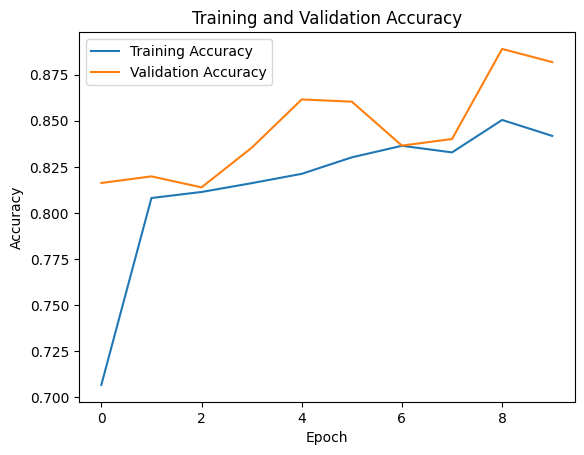

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

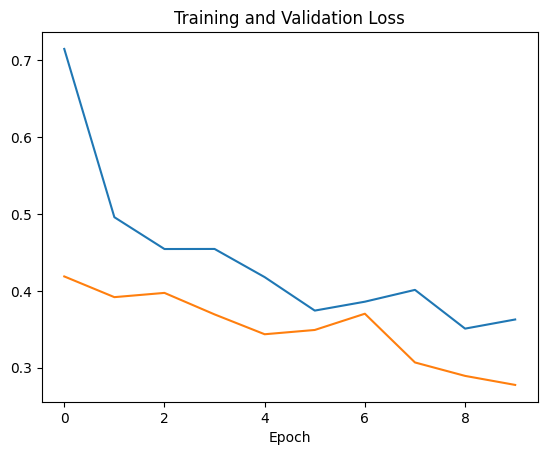

In [ ]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score

# Generate predictions for the validation set
val_predictions = model.predict(val_generator)
val_pred_labels = np.argmax(val_predictions, axis=1)

# Get true labels for the validation set
val_true_labels = val_generator.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(val_true_labels, val_pred_labels)

# Compute classification report
class_report = classification_report(val_true_labels, val_pred_labels)

# Compute accuracy
accuracy = accuracy_score(val_true_labels, val_pred_labels)

# Compute F1 score
f1 = f1_score(val_true_labels, val_pred_labels, average='weighted')

# Compute precision
precision = precision_score(val_true_labels, val_pred_labels, average='weighted')

# Compute recall
recall = recall_score(val_true_labels, val_pred_labels, average='weighted')

# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nAccuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)


27/27 [==============================] - 5s 181ms/step
Confusion Matrix:
[[191  12  20   0]
 [  6 218   4   0]
 [ 45  10  71   1]
 [  1   0   0 259]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       223
           1       0.91      0.96      0.93       228
           2       0.75      0.56      0.64       127
           3       1.00      1.00      1.00       260

    accuracy                           0.88       838
   macro avg       0.86      0.84      0.85       838
weighted avg       0.88      0.88      0.88       838


Accuracy: 0.8818615751789977
F1 Score: 0.8776217968398411
Precision: 0.878634397213163
Recall: 0.8818615751789977


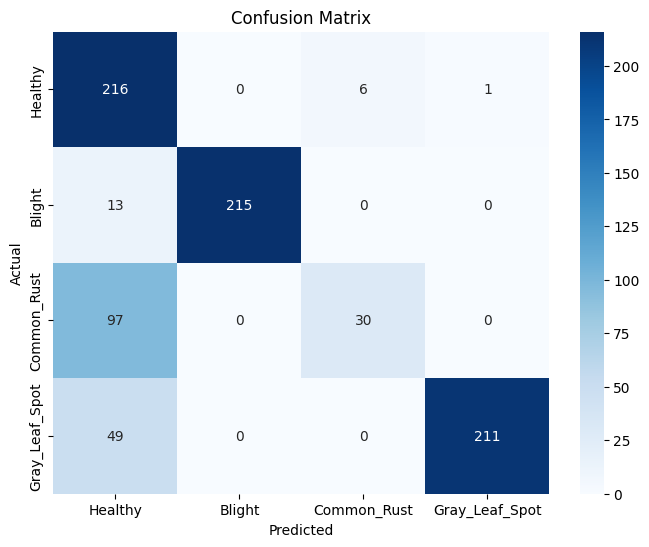

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy', 'Blight', 'Common_Rust','Gray_Leaf_Spot'],
            yticklabels=['Healthy', 'Blight', 'Common_Rust','Gray_Leaf_Spot'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
######3rd one
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = "/content/drive/MyDrive/train_data"
val_dir = "/content/drive/MyDrive/val_data"
batch_size=32

# Data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)  # only normalization for validation data

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='sparse'
)

# Flow validation images in batches of 32 using val_datagen generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

Found 3350 images belonging to 4 classes.
Found 838 images belonging to 4 classes.


In [ ]:
###3rd one

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from collections import Counter
import pandas as pd
import os

# Number of classes
nb_classes = 4

# Define the optimizer
opt = Adam(learning_rate=0.001)

# Initialize the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 classes, so the output layer has 4 neurons with softmax activation

# Compile the model
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# Define a checkpoint callback
checkpoint_path = "model_checkpoint2.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=30,
                    validation_data=val_generator,
                    validation_steps=len(val_generator),
                    callbacks=[checkpoint],
                    verbose=1)

# # Save the entire model
# model.save("model_checkpoint_Imagessize_224_type21.weights.keras")
# print("Model saved successfully.")
# Save the entire model to Google Drive
model.save("/content/drive/My Drive/model_checkpoint2.weights.h5")
print("Model saved successfully in Google Drive.")

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(train_generator)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_generator)

# Print training loss and accuracy
print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)

# Print validation loss and accuracy
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)



Epoch 1/30
105/105 [==============================] - ETA: 0s - loss: 0.6735 - accuracy: 0.7203
Epoch 1: val_accuracy improved from -inf to 0.79236, saving model to model_checkpoint2.keras
105/105 [==============================] - 596s 6s/step - loss: 0.6735 - accuracy: 0.7203 - val_loss: 0.4838 - val_accuracy: 0.7924
Epoch 2/30
105/105 [==============================] - ETA: 0s - loss: 0.4355 - accuracy: 0.8275
Epoch 2: val_accuracy improved from 0.79236 to 0.85084, saving model to model_checkpoint2.keras
105/105 [==============================] - 518s 5s/step - loss: 0.4355 - accuracy: 0.8275 - val_loss: 0.3984 - val_accuracy: 0.8508
Epoch 3/30
105/105 [==============================] - ETA: 0s - loss: 0.3902 - accuracy: 0.8418
Epoch 3: val_accuracy did not improve from 0.85084
105/105 [==============================] - 481s 5s/step - loss: 0.3902 - accuracy: 0.8418 - val_loss: 0.3354 - val_accuracy: 0.8413
Epoch 4/30
105/105 [==============================] - ETA: 0s - loss: 0.3413

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully in Google Drive.
27/27 [==============================] - 36s 1s/step - loss: 0.5652 - accuracy: 0.9117
Training Loss: 0.002844529692083597
Training Accuracy: 0.9997014999389648
Validation Loss: 0.5651758313179016
Validation Accuracy: 0.9116945266723633


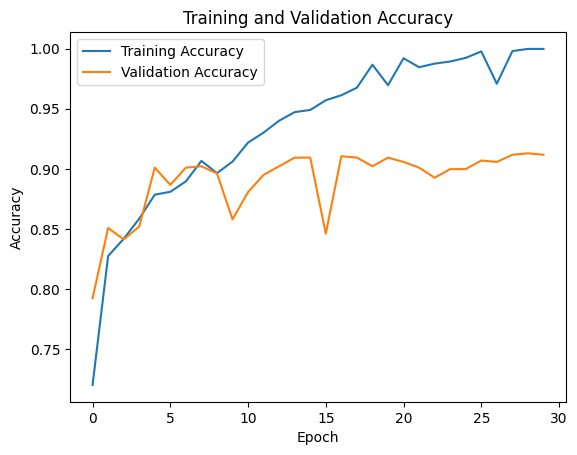

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

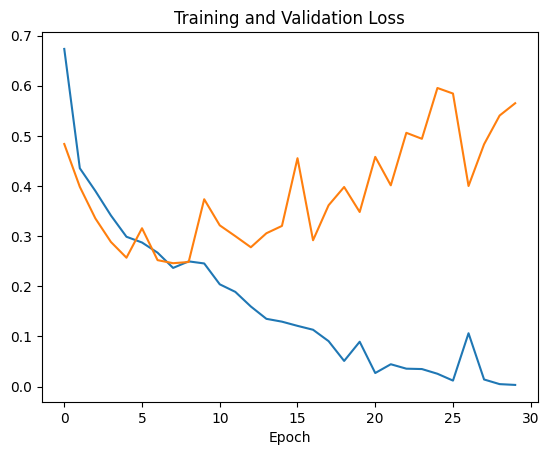

In [ ]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt

In [ ]:
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
# import numpy as np
# # Generate predictions for the validation set
# val_predictions = model.predict(val_generator)
# val_pred_labels = np.argmax(val_predictions, axis=1)

# # Get true labels for the validation set
# val_true_labels = val_generator.classes

# # Compute confusion matrix
# conf_matrix = confusion_matrix(val_true_labels, val_pred_labels)

# # Compute classification report
# class_report = classification_report(val_true_labels, val_pred_labels)

# # Compute accuracy
# accuracy = accuracy_score(val_true_labels, val_pred_labels)

# # Compute F1 score
# f1 = f1_score(val_true_labels, val_pred_labels, average='weighted')

# # Compute precision
# precision = precision_score(val_true_labels, val_pred_labels, average='weighted')

# # Compute recall
# recall = recall_score(val_true_labels, val_pred_labels, average='weighted')

# # Print the results
# print("Confusion Matrix:")
# print(conf_matrix)
# print("\nClassification Report:")
# print(class_report)
# print("\nAccuracy:", accuracy)
# print("F1 Score:", f1)
# print("Precision:", precision)
# print("Recall:", recall)

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict classes for validation data
predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_generator.classes

# Compute evaluation metrics
accuracy = np.mean(predicted_classes == true_classes)
report = classification_report(true_classes, predicted_classes, target_names=val_generator.class_indices.keys())
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Compute correlation metrics
# Assuming your classes are ordinal, and you have ground truth ordinal labels
# Let's say true ordinal labels are in val_generator.labels
true_ordinal_labels = val_generator.labels
predicted_ordinal_labels = predicted_classes  # Assuming predicted classes correspond to ordinal labels

# Calculate Pearson correlation coefficient
pearson_corr_coef = np.corrcoef(true_ordinal_labels, predicted_ordinal_labels)[0, 1]

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
print("Pearson Correlation Coefficient:", pearson_corr_coef)



27/27 [==============================] - 39s 1s/step
Evaluation Metrics:
Accuracy: 0.9116945107398569
Classification Report:
                 precision    recall  f1-score   support

        Blight       0.85      0.86      0.85       223
   Common_Rust       0.95      0.96      0.95       228
Gray_Leaf_Spot       0.78      0.76      0.77       127
       Healthy       1.00      0.99      1.00       260

      accuracy                           0.91       838
     macro avg       0.89      0.89      0.89       838
  weighted avg       0.91      0.91      0.91       838

Confusion Matrix:
 [[191   9  23   0]
 [  5 219   4   0]
 [ 28   3  96   0]
 [  2   0   0 258]]
Pearson Correlation Coefficient: 0.8967860733201061


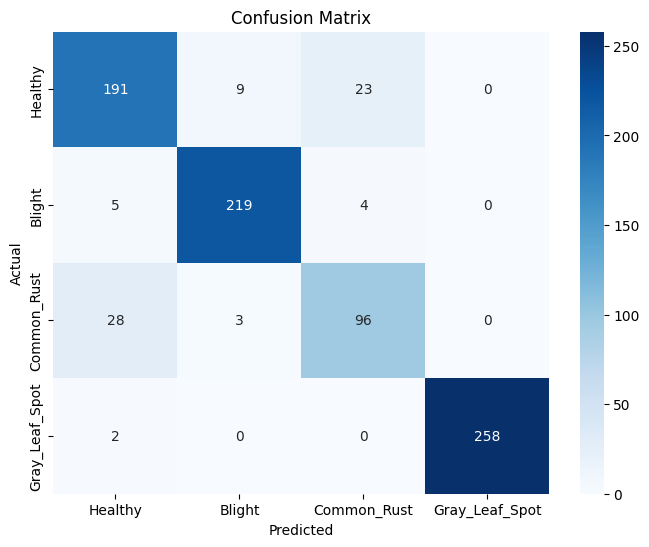

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# true_classes = val_generator.classes
# Compute confusion matrix
cm = confusion_matrix(val_true_labels, val_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy', 'Blight', 'Common_Rust','Gray_Leaf_Spot'],
            yticklabels=['Healthy', 'Blight', 'Common_Rust','Gray_Leaf_Spot'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
##4th one

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = "/content/drive/MyDrive/train_data"
val_dir = "/content/drive/MyDrive/val_data"
batch_size=32

# Data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)  # only normalization for validation data

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='sparse'
)

# Flow validation images in batches of 32 using val_datagen generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

Found 3350 images belonging to 4 classes.
Found 838 images belonging to 4 classes.


In [ ]:
###4th

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from collections import Counter
import pandas as pd
import os

# Number of classes
nb_classes = 4

# Define the optimizer
opt = Adam(learning_rate=0.001)

# Initialize the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 classes, so the output layer has 4 neurons with softmax activation

# Compile the model
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# Define a checkpoint callback
checkpoint_path = "model_checkpoint2.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=5,
                    validation_data=val_generator,
                    validation_steps=len(val_generator),
                    callbacks=[checkpoint],
                    verbose=1)

# # Save the entire model
# model.save("model_checkpoint_Imagessize_224_type21.weights.keras")
# print("Model saved successfully.")
# Save the entire model to Google Drive
model.save("/content/drive/My Drive/model_checkpoint2.weights.h5")
print("Model saved successfully in Google Drive.")

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(train_generator)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_generator)

# Print training loss and accuracy
print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)

# Print validation loss and accuracy
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)



Epoch 1/5
105/105 [==============================] - ETA: 0s - loss: 0.6984 - accuracy: 0.7116
Epoch 1: val_accuracy improved from -inf to 0.80788, saving model to model_checkpoint2.keras
105/105 [==============================] - 58s 542ms/step - loss: 0.6984 - accuracy: 0.7116 - val_loss: 0.5076 - val_accuracy: 0.8079
Epoch 2/5
105/105 [==============================] - ETA: 0s - loss: 0.4333 - accuracy: 0.8224
Epoch 2: val_accuracy improved from 0.80788 to 0.86158, saving model to model_checkpoint2.keras
105/105 [==============================] - 57s 538ms/step - loss: 0.4333 - accuracy: 0.8224 - val_loss: 0.3642 - val_accuracy: 0.8616
Epoch 3/5
105/105 [==============================] - ETA: 0s - loss: 0.3944 - accuracy: 0.8406
Epoch 3: val_accuracy did not improve from 0.86158
105/105 [==============================] - 56s 530ms/step - loss: 0.3944 - accuracy: 0.8406 - val_loss: 0.3334 - val_accuracy: 0.8461
Epoch 4/5
105/105 [==============================] - ETA: 0s - loss: 0.36

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully in Google Drive.
27/27 [==============================] - 5s 175ms/step - loss: 0.3228 - accuracy: 0.8640
Training Loss: 0.3107888698577881
Training Accuracy: 0.8647761344909668
Validation Loss: 0.3228456676006317
Validation Accuracy: 0.8639618158340454


In [ ]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict classes for validation data
predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_generator.classes

# Compute evaluation metrics
accuracy = np.mean(predicted_classes == true_classes)
report = classification_report(true_classes, predicted_classes, target_names=val_generator.class_indices.keys())
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Compute correlation metrics
# Assuming your classes are ordinal, and you have ground truth ordinal labels
# Let's say true ordinal labels are in val_generator.labels
true_ordinal_labels = val_generator.labels
predicted_ordinal_labels = predicted_classes  # Assuming predicted classes correspond to ordinal labels

# Calculate Pearson correlation coefficient
pearson_corr_coef = np.corrcoef(true_ordinal_labels, predicted_ordinal_labels)[0, 1]

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
print("Pearson Correlation Coefficient:", pearson_corr_coef)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# true_classes = val_generator.classes
# Compute confusion matrix
cm = confusion_matrix(val_true_labels, val_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy', 'Blight', 'Common_Rust','Gray_Leaf_Spot'],
            yticklabels=['Healthy', 'Blight', 'Common_Rust','Gray_Leaf_Spot'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
###5th
###4th

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from collections import Counter
import pandas as pd
import os

# Number of classes
nb_classes = 4

# Define the optimizer
opt = Adam(learning_rate=0.001)

# Initialize the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 classes, so the output layer has 4 neurons with softmax activation

# Compile the model
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# Define a checkpoint callback
checkpoint_path = "model_checkpoint2.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=10,
                    validation_data=val_generator,
                    validation_steps=len(val_generator),
                    callbacks=[checkpoint],
                    verbose=1)

# # Save the entire model
# model.save("model_checkpoint_Imagessize_224_type21.weights.keras")
# print("Model saved successfully.")
# Save the entire model to Google Drive
model.save("/content/drive/My Drive/model_checkpoint2.weights.h5")
print("Model saved successfully in Google Drive.")

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(train_generator)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_generator)

# Print training loss and accuracy
print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)

# Print validation loss and accuracy
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)



Epoch 1/10
105/105 [==============================] - ETA: 0s - loss: 0.9401 - accuracy: 0.5806
Epoch 1: val_accuracy improved from -inf to 0.68377, saving model to model_checkpoint2.keras
105/105 [==============================] - 58s 535ms/step - loss: 0.9401 - accuracy: 0.5806 - val_loss: 0.6565 - val_accuracy: 0.6838
Epoch 2/10
105/105 [==============================] - ETA: 0s - loss: 0.4707 - accuracy: 0.8110
Epoch 2: val_accuracy improved from 0.68377 to 0.85919, saving model to model_checkpoint2.keras
105/105 [==============================] - 56s 530ms/step - loss: 0.4707 - accuracy: 0.8110 - val_loss: 0.4055 - val_accuracy: 0.8592
Epoch 3/10
105/105 [==============================] - ETA: 0s - loss: 0.4401 - accuracy: 0.8287
Epoch 3: val_accuracy did not improve from 0.85919
105/105 [==============================] - 56s 531ms/step - loss: 0.4401 - accuracy: 0.8287 - val_loss: 0.3774 - val_accuracy: 0.8222
Epoch 4/10
105/105 [==============================] - ETA: 0s - loss: 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict classes for validation data
predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_generator.classes

# Compute evaluation metrics
accuracy = np.mean(predicted_classes == true_classes)
report = classification_report(true_classes, predicted_classes, target_names=val_generator.class_indices.keys())
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Compute correlation metrics
# Assuming your classes are ordinal, and you have ground truth ordinal labels
# Let's say true ordinal labels are in val_generator.labels
true_ordinal_labels = val_generator.labels
predicted_ordinal_labels = predicted_classes  # Assuming predicted classes correspond to ordinal labels

# Calculate Pearson correlation coefficient
pearson_corr_coef = np.corrcoef(true_ordinal_labels, predicted_ordinal_labels)[0, 1]

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
print("Pearson Correlation Coefficient:", pearson_corr_coef)

27/27 [==============================] - 5s 178ms/step
Evaluation Metrics:
Accuracy: 0.8782816229116945
Classification Report:
                 precision    recall  f1-score   support

        Blight       0.89      0.73      0.80       223
   Common_Rust       0.95      0.94      0.94       228
Gray_Leaf_Spot       0.62      0.79      0.70       127
       Healthy       0.97      1.00      0.98       260

      accuracy                           0.88       838
     macro avg       0.86      0.86      0.86       838
  weighted avg       0.89      0.88      0.88       838

Confusion Matrix:
 [[163   4  52   4]
 [  5 214   8   1]
 [ 15   8 100   4]
 [  1   0   0 259]]
Pearson Correlation Coefficient: 0.8526403465413762


In [ ]:
##6th


from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = "/content/drive/MyDrive/train_data"
val_dir = "/content/drive/MyDrive/val_data"
batch_size=32

# Data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)  # only normalization for validation data

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='sparse'
)

# Flow validation images in batches of 32 using val_datagen generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

Found 3350 images belonging to 4 classes.
Found 838 images belonging to 4 classes.


In [ ]:
###6th

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from collections import Counter
import pandas as pd
import os

# Number of classes
nb_classes = 4

# Define the optimizer
opt = Adam(learning_rate=0.001)

# Initialize the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 classes, so the output layer has 4 neurons with softmax activation

# Compile the model
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# Define a checkpoint callback
checkpoint_path = "model_checkpoint2.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=10,
                    validation_data=val_generator,
                    validation_steps=len(val_generator),
                    callbacks=[checkpoint],
                    verbose=1)

# # Save the entire model
# model.save("model_checkpoint_Imagessize_224_type21.weights.keras")
# print("Model saved successfully.")
# Save the entire model to Google Drive
model.save("/content/drive/My Drive/model_checkpoint2.weights.h5")
print("Model saved successfully in Google Drive.")

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(train_generator)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_generator)

# Print training loss and accuracy
print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)

# Print validation loss and accuracy
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)



Epoch 1/10
105/105 [==============================] - ETA: 0s - loss: 0.9026 - accuracy: 0.5946
Epoch 1: val_accuracy improved from -inf to 0.79952, saving model to model_checkpoint2.keras
105/105 [==============================] - 58s 540ms/step - loss: 0.9026 - accuracy: 0.5946 - val_loss: 0.5431 - val_accuracy: 0.7995
Epoch 2/10
105/105 [==============================] - ETA: 0s - loss: 0.5173 - accuracy: 0.8090
Epoch 2: val_accuracy improved from 0.79952 to 0.82100, saving model to model_checkpoint2.keras
105/105 [==============================] - 56s 530ms/step - loss: 0.5173 - accuracy: 0.8090 - val_loss: 0.4306 - val_accuracy: 0.8210
Epoch 3/10
105/105 [==============================] - ETA: 0s - loss: 0.4655 - accuracy: 0.8164
Epoch 3: val_accuracy did not improve from 0.82100
105/105 [==============================] - 56s 531ms/step - loss: 0.4655 - accuracy: 0.8164 - val_loss: 0.3733 - val_accuracy: 0.8198
Epoch 4/10
105/105 [==============================] - ETA: 0s - loss: 

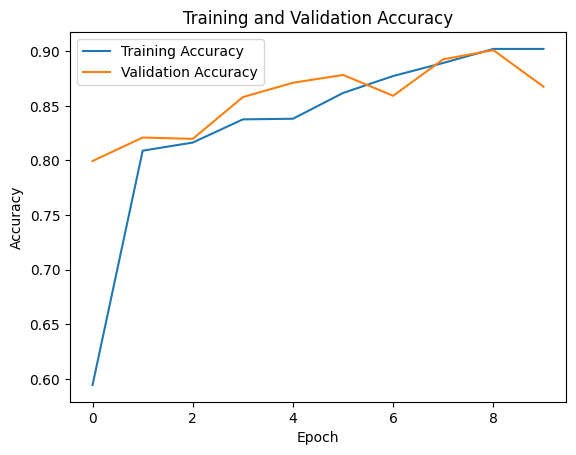

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

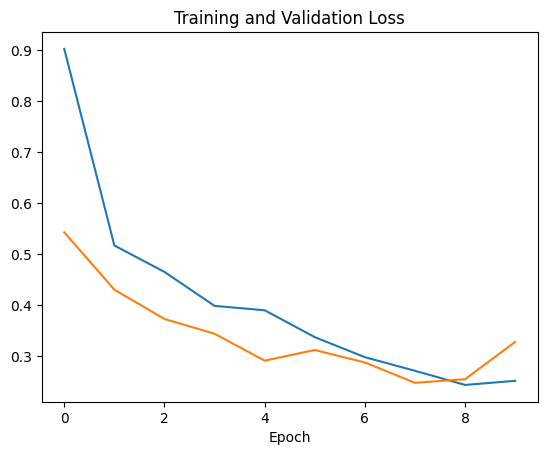

In [ ]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict classes for validation data
predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_generator.classes

# Compute evaluation metrics
accuracy = np.mean(predicted_classes == true_classes)
report = classification_report(true_classes, predicted_classes, target_names=val_generator.class_indices.keys())
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Compute correlation metrics
# Assuming your classes are ordinal, and you have ground truth ordinal labels
# Let's say true ordinal labels are in val_generator.labels
true_ordinal_labels = val_generator.labels
predicted_ordinal_labels = predicted_classes  # Assuming predicted classes correspond to ordinal labels

# Calculate Pearson correlation coefficient
pearson_corr_coef = np.corrcoef(true_ordinal_labels, predicted_ordinal_labels)[0, 1]

# Print evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
print("Pearson Correlation Coefficient:", pearson_corr_coef)

27/27 [==============================] - 5s 176ms/step
Evaluation Metrics:
Accuracy: 0.8675417661097852
Classification Report:
                 precision    recall  f1-score   support

        Blight       0.78      0.80      0.79       223
   Common_Rust       0.90      0.96      0.93       228
Gray_Leaf_Spot       0.72      0.56      0.63       127
       Healthy       0.96      1.00      0.98       260

      accuracy                           0.87       838
     macro avg       0.84      0.83      0.83       838
  weighted avg       0.86      0.87      0.86       838

Confusion Matrix:
 [[179  14  26   4]
 [  7 218   1   2]
 [ 43   9  71   4]
 [  0   0   1 259]]
Pearson Correlation Coefficient: 0.8506673822965846


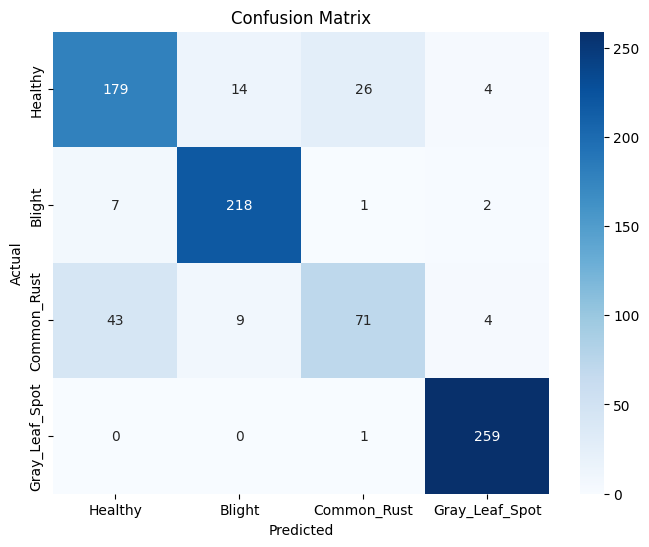

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# true_classes = val_generator.classes
# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy', 'Blight', 'Common_Rust','Gray_Leaf_Spot'],
            yticklabels=['Healthy', 'Blight', 'Common_Rust','Gray_Leaf_Spot'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
###7th
##6th


from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = "/content/drive/MyDrive/train_data"
val_dir = "/content/drive/MyDrive/val_data"
batch_size=32

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,  # normalize pixel values to [0,1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)  # only normalization for validation data

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='sparse'
)

# Flow validation images in batches of 32 using val_datagen generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)


Found 3350 images belonging to 4 classes.
Found 838 images belonging to 4 classes.


In [ ]:
###7th

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from collections import Counter
import pandas as pd
import os

# Number of classes
nb_classes = 4

# Define the optimizer
opt = Adam(learning_rate=0.01)

# Initialize the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 classes, so the output layer has 4 neurons with softmax activation

# Compile the model
model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# Define a checkpoint callback
checkpoint_path = "model_checkpoint123.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=10,
                    validation_data=val_generator,
                    validation_steps=len(val_generator),
                    callbacks=[checkpoint],
                    verbose=1)

# # Save the entire model
# model.save("model_checkpoint_Imagessize_224_type21.weights.keras")
# print("Model saved successfully.")
# Save the entire model to Google Drive
model.save("/content/drive/My Drive/model_checkpoint123.weights.h5")
print("Model saved successfully in Google Drive.")

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(train_generator)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_generator)

# Print training loss and accuracy
print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)

# Print validation loss and accuracy
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)



Epoch 1/10
 12/105 [==>...........................] - ETA: 12:12 - loss: 5.2130 - accuracy: 0.3099

KeyboardInterrupt: 

In [ ]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt